# Project Implementation

*by: Khairul Amiruf and Mervin Lee*

*class: Sunday 12pm*

## Problem Statement


This project aims to analyse and evaluate the relationship between food expenditure behaviour and its impact on consumers’ heath in the US. We will be using Body-Mass-Index as a basis of evaluation for health patterns. 

Over the years, the food scene in Singapore is becoming more and more varied, gaining influence from all corners of the globe, more so from the Western countries. Consequently, the analysis on US food expenditure patterns can be related to Singapore as we are becoming increasingly synonymous with them. Therefore, this analysis would be relevant to Singapore's population as well. 


## Data Sets

We will be using 2 datasets to conduct our analysis. 
1. Normalized food expenditures by final purchasers and users, from previously-published estimates  from: Archived Food Expenditure Tables https://www.ers.usda.gov/data-products/food-expenditure-series/
2. BMI data specific to country: United States of America http://www.ncdrisc.org/data-downloads-adiposity.html
3. Daily dutrients intake: Nutrients (food energy, nutrients, and dietary components) https://www.ers.usda.gov/data-products/food-availability-per-capita-data-system/


Through these datasets, we intend to meet these objectives: 
- What is the trend of food expenditure in the US? (Eating in vs eating out)
- What is the trend of the Body-Mass-Index (BMI) for US citizens? 
- Is there a relationship between the food expenditure trend and BMI trend in USA?
- If there is, is the relationship strong? Could there be other possibilities that might cause the changes?


##  Description of Datasets

We decided to use an Archived Food Expenditure dataset over a more recent dataset due to the normalized data. Previously, we intended to use a dataset that is more current. However, it was data of nominal expenditure, which means that inflation was not taken into account for the values. Thus, the increase in expenditure values over the years could be attributed to various reasons that could not be accounted for. This would diminish the meaningfulness of this analysis.

In the ‘Normalized food expenditures’ dataset, the data categories are ‘Food expenditure share of disposable personal income’, ‘Share of food expenditures’, ‘Nominal expenditure per capita’ and ‘Constant dollar expenditure per capita’ over the years of 1995-2014. 

In the BMI dataset, the columns we will be using are ‘Sex’, ‘Year’ and  ‘Mean BMI’ for years 1995-2014.

#### Importing the relevant Packages

In [1]:
#import relevant packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

FIG_SIZE = (10, 6)

### Reading the csv files and cleaning the Data

To start, we read the csv files into Pandas and cleaned the data, removing any blanks. This will help us plot and visualize our data later on. Next, we isolated our dataframes to only show the data we needed. Our analysis will be with regards to years 1996-2010. At first, all the files are in '.xlsx' format and we simply saved it as csv (with utf-8 encoding) and rename the datasets for simplicity sake. (you can do the same)

The dataframes that we will be working with are: 

*men_bmi* - mean BMI for males for year 1996-2010

*women_bmi* - mean BMI for females for years 1996-2010

*spend_df* - normalized expenditure on 1. Food at Home 2. Food Away From Home and 3. All Food

*nutrients_df* - the mean values for nutrients of people in the US (in terms of 1. Calorie intake 2. Carbohydrates intake 3. Fat intake 4. Protein intake) 

In [2]:
bmi_df = pd.read_csv('usa_bmi.csv', usecols=[2,3,4])
men_cond = bmi_df['Sex'] == 'Men'
women_cond = bmi_df['Sex'] == 'Women'

men_bmi = bmi_df[men_cond][21:36]
women_bmi = bmi_df[women_cond][21:36]

display(men_bmi.head())
display(women_bmi.head())

,Sex,Year,Mean BMI
21,Men,1996,27.250687
22,Men,1997,27.379647
23,Men,1998,27.507873
24,Men,1999,27.635375
25,Men,2000,27.761707


,Sex,Year,Mean BMI
63,Women,1996,27.014780
64,Women,1997,27.160382
65,Women,1998,27.303902
66,Women,1999,27.444786
67,Women,2000,27.581705


In [8]:
spend_df = pd.read_csv('normalized_expenditures.csv',
                       index_col = None, 
                       usecols=[0,11,12,13],
                      header = 5,
                      names=['Year', 'Food At Home', 'Food Away From Home', 'All Food'])

spend_df = spend_df[67:82]
spend_df.index = range(len(spend_df.index))
spend_df['Food At Home'] = spend_df['Food At Home'].str.replace(',', '')
spend_df['Food Away From Home'] = spend_df['Food Away From Home'].str.replace(',','')
spend_df['All Food'] = spend_df['All Food'].str.replace(',','')

spend_df = spend_df.astype(float)
spend_df['Year'] = spend_df['Year'].astype(int)

spend_df.head()

,Year,Food At Home,Food Away From Home,All Food
0,1996,1103.63,956.0,2059.0
1,1997,1097.05,937.0,2034.0
2,1998,1097.52,966.0,2063.0
3,1999,1091.87,979.0,2071.0
4,2000,1105.92,983.0,2088.0


In [4]:
nutrients_df = pd.read_csv('nutrients.csv',
                          header=1,
                          usecols=[0,1,2,3,4],
                          names=['Year', 'Food Energy', 'Carbohydrates', 'Protein', 'Fat'])

nutrients_df = nutrients_df[91:106]
nutrients_df.index = range(len(nutrients_df.index))

nutrients_df = nutrients_df.astype(float)

a = nutrients_df['Food Energy'][0]
b = nutrients_df['Carbohydrates'][0]
c = nutrients_df['Protein'][0]
d = nutrients_df['Fat'][0]

nutrients_df['Food Energy proportion'] = nutrients_df['Food Energy'] / a
nutrients_df['Carbohydrates proportion'] = nutrients_df['Carbohydrates'] / b
nutrients_df['Protein proportion'] = nutrients_df['Protein'] / c
nutrients_df['Fat proportion'] = nutrients_df['Fat'] / d

nutrients_df.head()

,Year,Food Energy,Carbohydrates,Protein,Fat,Food Energy proportion,Carbohydrates proportion,Protein proportion,Fat proportion
0,1996.0,3900.0,500.0,122.0,166.0,1.000000,1.000,1.000000,1.000000
1,1997.0,3900.0,503.0,121.0,165.0,1.000000,1.006,0.991803,0.993976
2,1998.0,3900.0,504.0,122.0,167.0,1.000000,1.008,1.000000,1.006024
3,1999.0,4000.0,506.0,124.0,173.0,1.025641,1.012,1.016393,1.042169
4,2000.0,4200.0,505.0,124.0,191.0,1.076923,1.010,1.016393,1.150602


## Visualising the datasets

We have decided to use Line graphs to plot our datasets. Line graphs are especially good for analyzing time-series data as they are able to show small changes in values and multiple plots can be plotted clearly on the same graph.


## *Food expenditure trend*

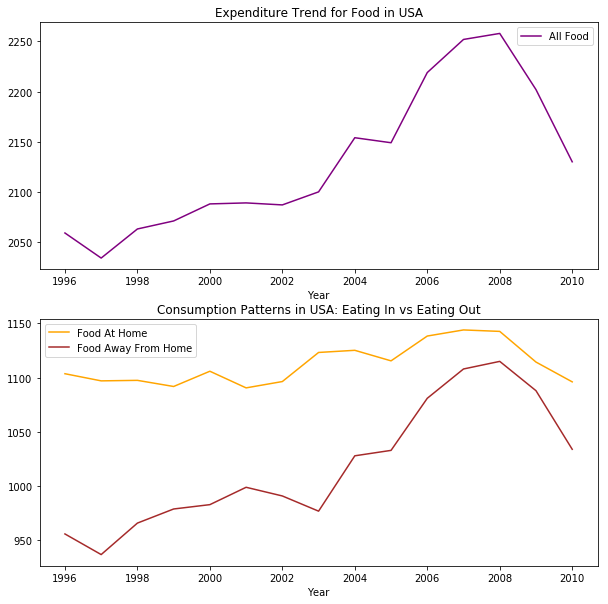

In [5]:
fig, ax = plt.subplots(nrows=2,figsize=(10,10))

spend_df.plot(kind = 'line',
              x = 'Year',
              y = 'All Food',
              ax = ax[0],
              color = 'purple')
ax[0].set_title('Expenditure Trend for Food in USA')


spend_df.plot(kind = 'line',
              x = 'Year',
              y = 'Food At Home',
              ax = ax[1],
              color = 'orange')

spend_df.plot(kind = 'line',
              x = 'Year',
              y = 'Food Away From Home',
              ax = ax[1],
              color = 'brown')

ax[1].set_title('Consumption Patterns in USA: Eating In vs Eating Out')

plt.show()


It can be seen from the plots that there has been an overall increase in expenditure for food in the USA rom 1996-2010. Looking into the spending patterns, this increase is largely due to an increase in consumers spending more for food away from home. Consumers are spending roughly the same amount of money on food for home consumption. 

The sharp drop in expenditure from 2008 - 2010 may be due to many reasons such as changing consumer patterns. However, we believe that it is likely to be due to the financial crisis of 2007-2008. That would have definitely affected the purchasing power of the people then. Also, the normalized expenditure on food increased continually from 2010 onwards, where the economy had since recovered. This makes it likely that the drop in expenditure in 2008 is due to the financial crisis.

Nonetheless, we have decided to continue using the data for these two years as it still shows a general increase over the years.

## *BMI Trend*

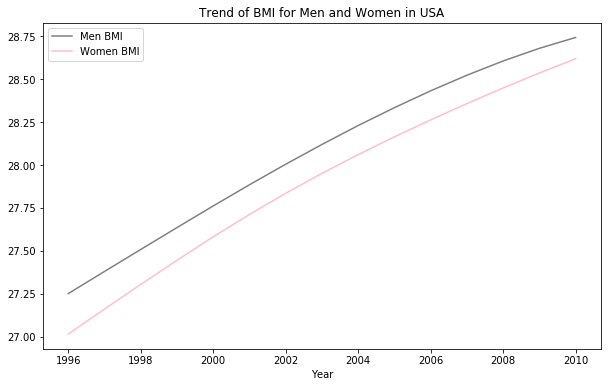

In [9]:
fig, ax3 = plt.subplots()

men_bmi.plot(kind = 'line',
             x = 'Year',
             y = 'Mean BMI',
             ax = ax3,
             figsize=FIG_SIZE,
             color = 'gray')


women_bmi.plot(kind = 'line',
               x = 'Year',
               y = 'Mean BMI',
               ax = ax3,
               figsize=FIG_SIZE,
               color = 'pink')

ax3.set_title('Trend of BMI for Men and Women in USA')
ax3.legend(['Men BMI', 'Women BMI'])

As seen from the plot, there has been a steady increase in both the mean BMI values for Men and Women in the USA from 1996-2010. 

There is an obvious correlation between the Food expenditure and mean BMI, but it is definitely not strong. Thus, we incorporated data on the **nutrients** that people in the US have consumed over the years. These are mean values of their daily Calorie intake (cals), Carbohydrate intake (g), Fat intake (g) and Protein intake (g). 

Text(0.5,1,'Composition of Individual Diet across the Years')

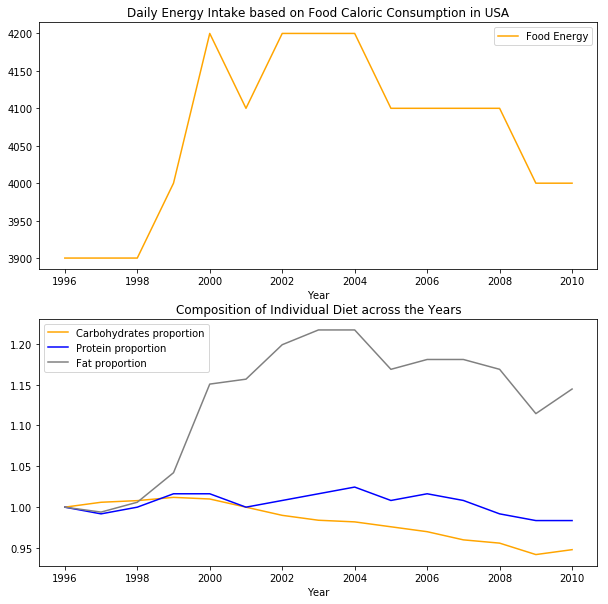

In [11]:
fig, ax = plt.subplots(nrows=2, figsize=(10,10))

nutrients_df = nutrients_df.astype(float)

# total energy intake
nutrients_df.plot(kind = 'line',
                  x = 'Year',
                  y = 'Food Energy',
                  ax = ax[0],
                  color = 'orange')
ax[0].set_title('Daily Energy Intake based on Food Caloric Consumption in USA')

# macros trend
# nutrients_df.plot(kind = 'line', x = 'Year', y = 'Food Energy proportion', ax = ax2, color = 'maroon')

nutrients_df.plot(kind = 'line', x = 'Year', y = 'Carbohydrates proportion', ax = ax[1], color = 'orange')

nutrients_df.plot(kind = 'line', x = 'Year', y = 'Protein proportion', ax = ax[1], color = 'blue')

nutrients_df.plot(kind = 'line', x = 'Year', y = 'Fat proportion', ax = ax[1], color = 'gray')

ax[1].set_title('Composition of Individual Diet across the Years')

The values for Carbohydrates, Fat and Protein are plotted as a proportion based on the value in year 1996. This gives us a better understanding on the percentage change the values experienced in the years. The amount of Carbohydrates, Fat and Protein varies quite alot and this helps us to better visualize the changes. 

From the results, we can see that Protein stays relatively the same, Carbohydrates have decreased by about 5% while Fat intake has increase over 15% over the 14 years. 

Calorie intake experienced many fluctuations over the years but have increased by about 100-150 calories per day. This is likely due to the increase in Fat intake (The Fat intake plot is similar to the Caloric Consumption plot). 

The increase in fat woud have caused the increase in calories because of the higher calorie per gram for fat over protein and carborhydrates, which is why fat contributes so much to the calorie count.

## What the data tells us

Consumer patterns are changing and more people are starting to eat out. Other than the increase in purchasing power and disposable income, thanks to globalization, the entrance of various unique restaurants and cuisines into the local food scene could be responsible for this. To curb their curiosity, more people tend to eat out as their lifestyles improved. 

However, little do they know that the nutritional value of eating out could be doing them more harm then good. Many dishes, especially tasty, deeply-fried foods, uses an exorbitant amount of oil. This can be seen from the huge spike in fats intake from the nutrients graph. 

As fats contribute to a greater increase in calorie count, the average person in USA has been consuming more calories over the years. As a result, their BMIs have been tending towards the overweight and obese sector progressively.

<br>
<br>
**TL;DR** <br>
Result 1: More people have been spending more money eating out.<br> Result 2: BMI increase.<br> Result 3: Increase in caloric intake due to fat.

Conclusion: People eat out, causing BMI increase due to higher caloric intake and fat intake. 

Thank you. :-)